In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
sns.set_style('darkgrid')

# Importing Dataset

In [333]:
df = pd.read_csv('survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Information on dataset

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [335]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [336]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [337]:
cancerMapping = {"YES": 2, "NO": 1} # going along with the scheme of the dataset
df["LUNG_CANCER"] = df["LUNG_CANCER"].map(cancerMapping)
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
2    270
1     39
Name: count, dtype: int64

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Plotting data

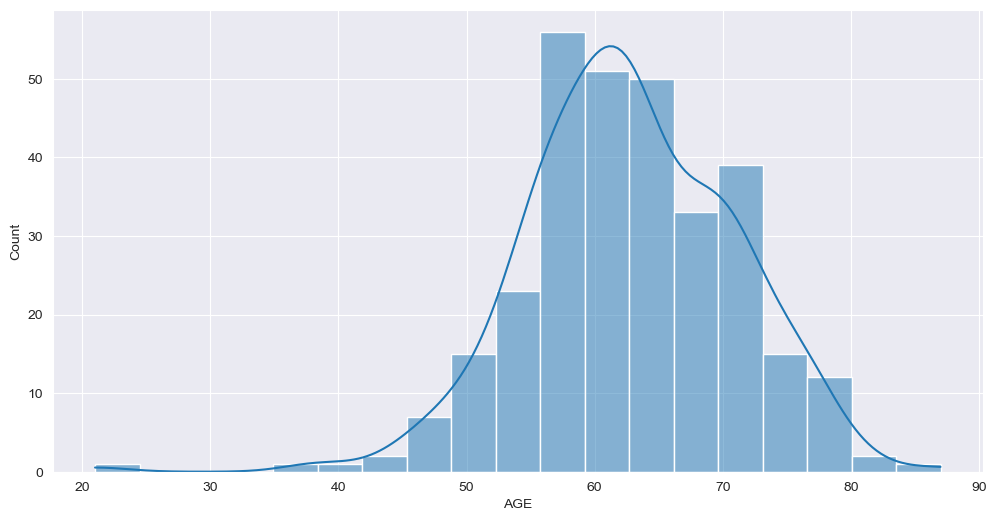

In [339]:
sns.histplot(df["AGE"], kde=True) #average age of the patients is around 60

plt.show()

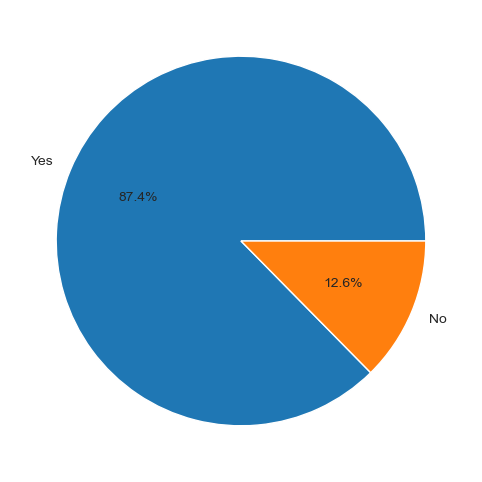

In [340]:
plt.pie(df["LUNG_CANCER"].value_counts(), labels=["Yes", "No"], autopct="%1.1f%%")
plt.show()

In [341]:
df.corr(numeric_only=True)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533


<Axes: >

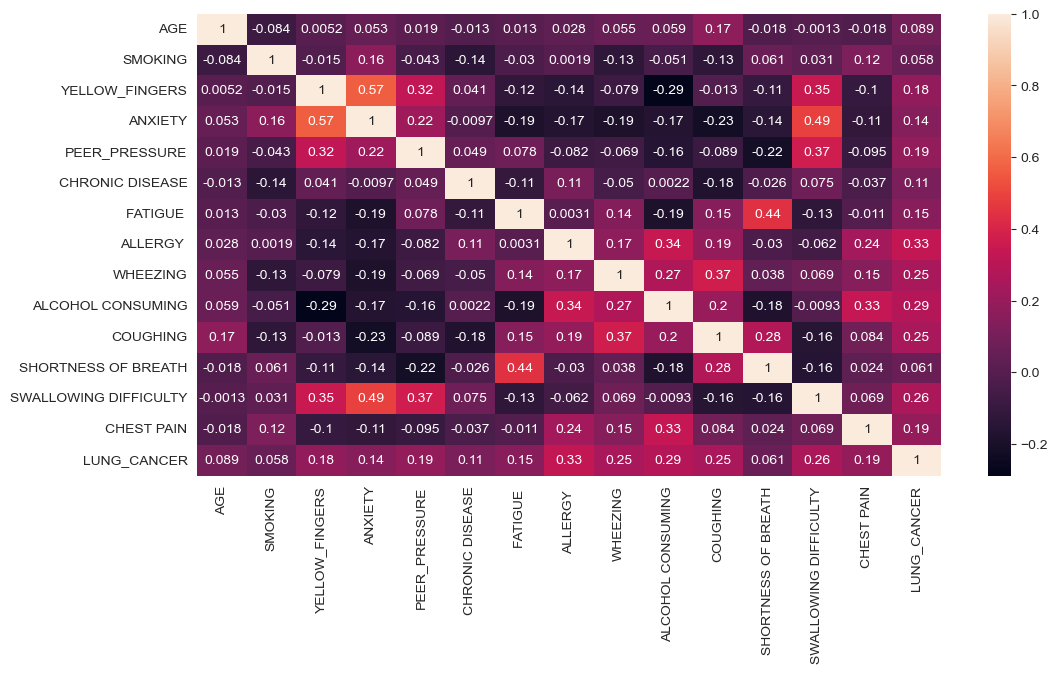

In [342]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

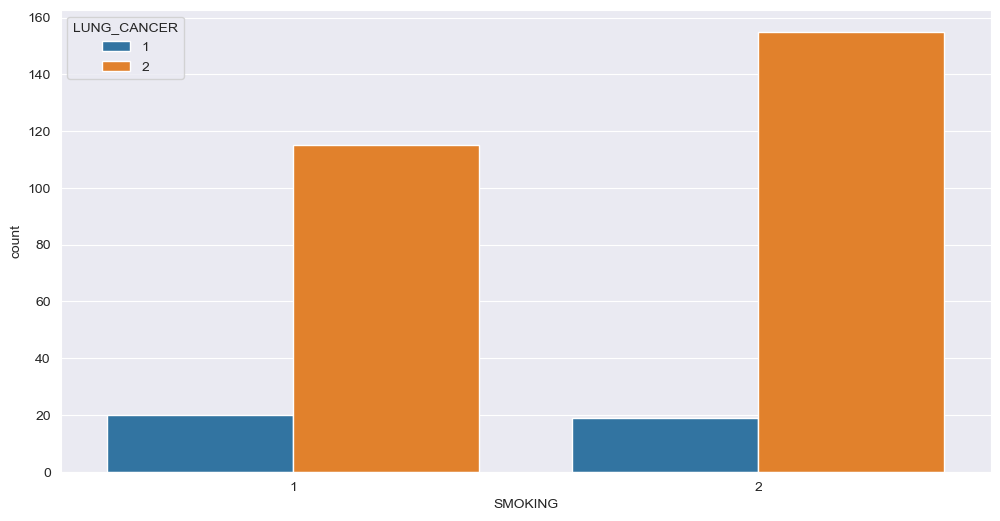

In [343]:
sns.countplot(x=df["SMOKING"], hue=df["LUNG_CANCER"]) # 1 -> No, 2 -> Yes
plt.show() # smokers are more likely to have lung cancer

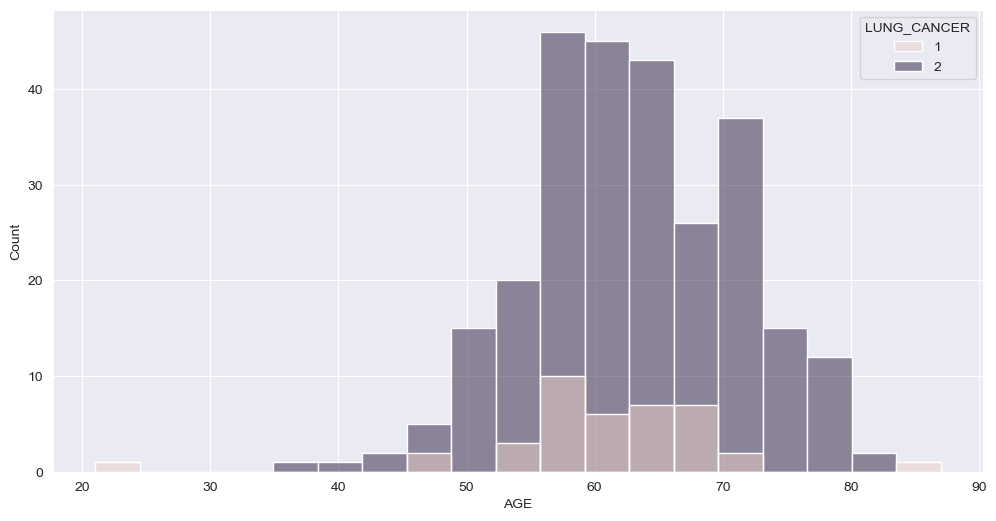

In [344]:
sns.histplot(x=df["AGE"], hue=df["LUNG_CANCER"]) # 1 -> No, 2 -> Yes
plt.show() # older people are more likely to have lung cancer

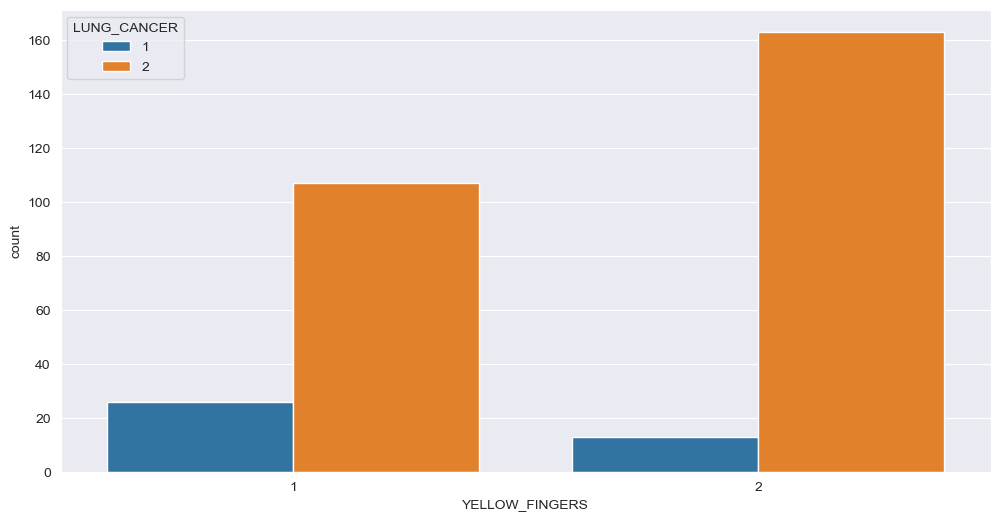

In [345]:
sns.countplot(x=df["YELLOW_FINGERS"], hue=df["LUNG_CANCER"]) # 1 -> No, 2 -> Yes
plt.show() # people with yellow fingers (hardcore smokers) are more likely to have lung cancer

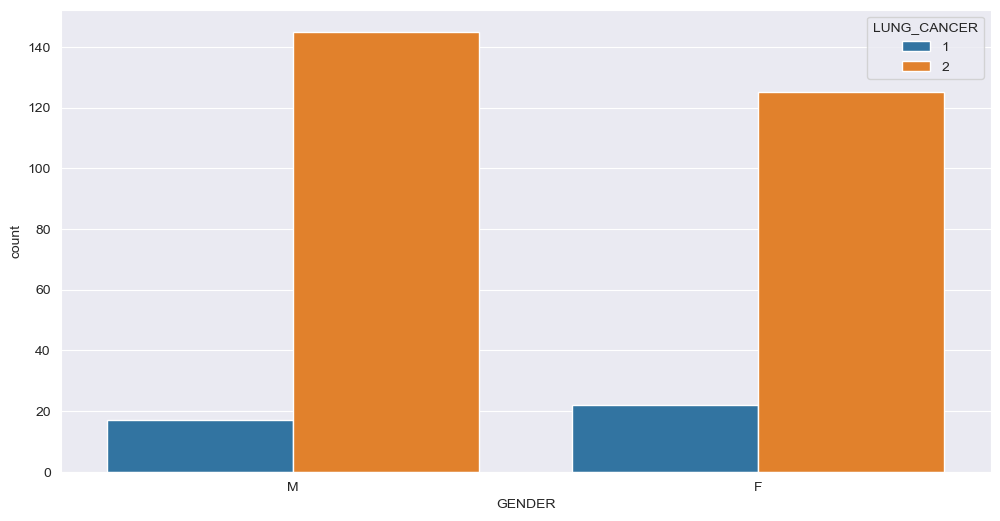

In [346]:
sns.countplot(x=df["GENDER"], hue=df["LUNG_CANCER"])
plt.show()

# Creating Models

In [347]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, drop_first=True)

X = df.drop(["LUNG_CANCER"], axis=1)
y = df["LUNG_CANCER"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model

The output of our model should be binary which points us to Logistic Regression

In [348]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [349]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_y_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_y_pred)
lr_conf = confusion_matrix(y_test, lr_y_pred)
lr_class = classification_report(y_test, lr_y_pred)

print("Logistic Regression Accuracy: ", lr_acc)
print("Logistic Regression Confusion Matrix: \n", lr_conf)
print("Logistic Regression Classification Report: \n", lr_class) # the accuracy on No's is low while the accuracy on Yes's is high

Logistic Regression Accuracy:  0.967741935483871
Logistic Regression Confusion Matrix: 
 [[ 1  1]
 [ 1 59]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [350]:
lr_m_y_pred = lr_model.predict(X_train)
lr_m_acc = accuracy_score(lr_m_y_pred, y_train) # the model is overfitting
lr_m_conf = confusion_matrix(lr_m_y_pred, y_train)
lr_m_class = classification_report(lr_m_y_pred, y_train)

print("Logistic Regression Model Accuracy: ", lr_m_acc)
print("Logistic Regression Model Confusion Matrix: \n", lr_m_conf)
print("Logistic Regression Model Classification Report: \n", lr_m_class)

Logistic Regression Model Accuracy:  0.9311740890688259
Logistic Regression Model Confusion Matrix: 
 [[ 26   6]
 [ 11 204]]
Logistic Regression Model Classification Report: 
               precision    recall  f1-score   support

           1       0.70      0.81      0.75        32
           2       0.97      0.95      0.96       215

    accuracy                           0.93       247
   macro avg       0.84      0.88      0.86       247
weighted avg       0.94      0.93      0.93       247



This model seems to be overfitting the data due to the low accuracy on 1's on the test set and the higher accuracy of 1's on the training set. This is reasonable due to the input size being small

## Linear Discriminant Analysis Model
Since our output is binary, we want to maximize the seperatibility of many categories. We can do this by using a Linear Discriminant Analysis model. Resource on it found [here](https://www.youtube.com/watch?v=azXCzI57Yfc).

In [351]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8) # using a different training set than the one used for logistic regression

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [352]:
lda_y_pred = lda_model.predict(X_test)

lda_acc = accuracy_score(y_test, lda_y_pred)
lda_conf = confusion_matrix(y_test, lda_y_pred)
lda_class = classification_report(y_test, lda_y_pred)

print("LDA Accuracy: ", lda_acc)
print("LDA Confusion Matrix: \n", lda_conf)
print("LDA Classification Report: \n", lda_class)

LDA Accuracy:  0.9516129032258065
LDA Confusion Matrix: 
 [[ 6  2]
 [ 1 53]]
LDA Classification Report: 
               precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.96      0.98      0.97        54

    accuracy                           0.95        62
   macro avg       0.91      0.87      0.89        62
weighted avg       0.95      0.95      0.95        62



In [353]:
lda_m_y_pred = lda_model.predict(X_train)
lda_m_acc = accuracy_score(lda_m_y_pred, y_train) 
lda_m_conf = confusion_matrix(lda_m_y_pred, y_train)
lda_m_class = classification_report(lda_m_y_pred, y_train)

print("Linear Discriminant Analysis Model Accuracy: ", lda_m_acc)
print("Linear Discriminant Analysis Model Confusion Matrix: \n", lda_m_conf)
print("Linear Discriminant Analysis Model Classification Report: \n", lda_m_class)

Linear Discriminant Analysis Model Accuracy:  0.9271255060728745
Linear Discriminant Analysis Model Confusion Matrix: 
 [[ 20   7]
 [ 11 209]]
Linear Discriminant Analysis Model Classification Report: 
               precision    recall  f1-score   support

           1       0.65      0.74      0.69        27
           2       0.97      0.95      0.96       220

    accuracy                           0.93       247
   macro avg       0.81      0.85      0.82       247
weighted avg       0.93      0.93      0.93       247



After trying different random states for the data split, some give a higher accuracy than others but what I notices is that all of the splits give a high accuracy on 2s (Has lung cancer) while 1s varied from 0.5 to 0.95. This is also due to over fitting and other possible problems.

# Conclusion
After trying these two models out, I noticed that one big problem that I had was overfitting due to small sample size. Additionally 20% of the sample size would be used for testing which made the sample for training the models even smaller. Overall, the accuracy of both model was over 90%. While the accuracy of predicting lung cancer in patients was very high, one main issue was the prediction of patients without lung cancer, aroung 60% for both models, which caused the overall accuracy to reduce. This could be fixed by increasing the sample size.